## Extractions in PyVista: Clipping

This notebook includes example code for:
* Clipping at a certain latitude value.
* Clipping with a surface
* "Trimmed" vs "Enclosed" extractions

In [1]:
import numpy as np
import pyvista as pv

# Load in the example vtk file.
filename = 'ugrid_sst_t0.vtk'
mesh = pv.read(filename)

### Clip at a certain latitude value

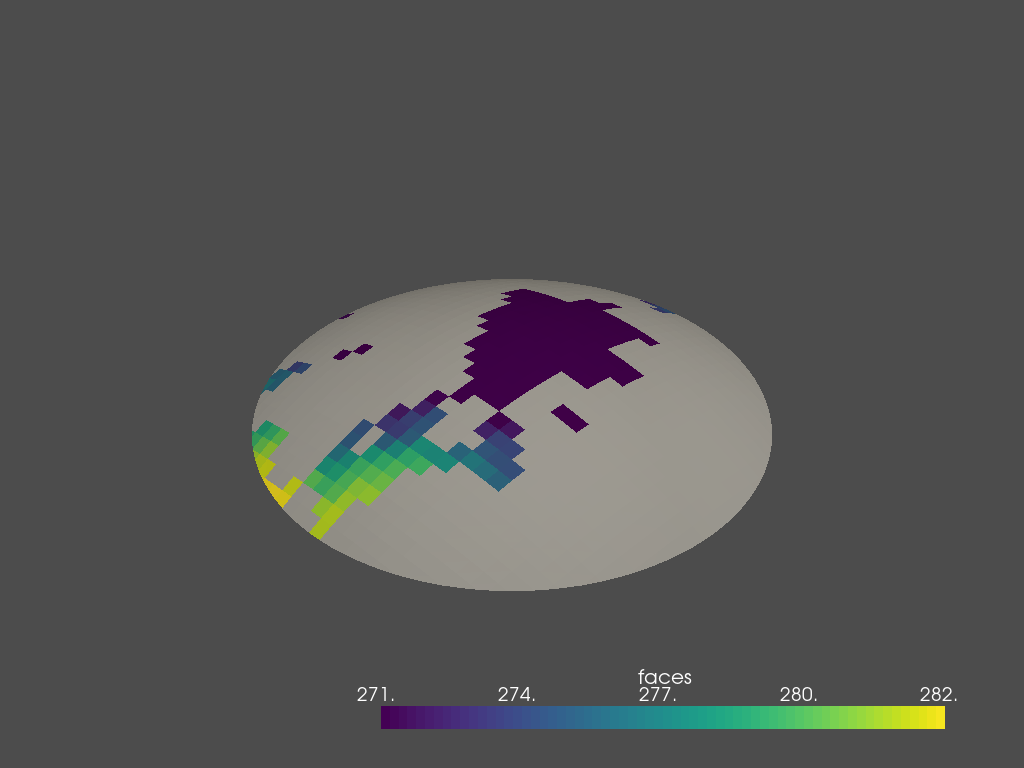

In [2]:
# Extract the region above latitude=60
min_lat = np.sin(np.deg2rad(60))
mesh_above_60 = mesh.clip('z', invert=False, value=min_lat)
mesh_above_60.plot()

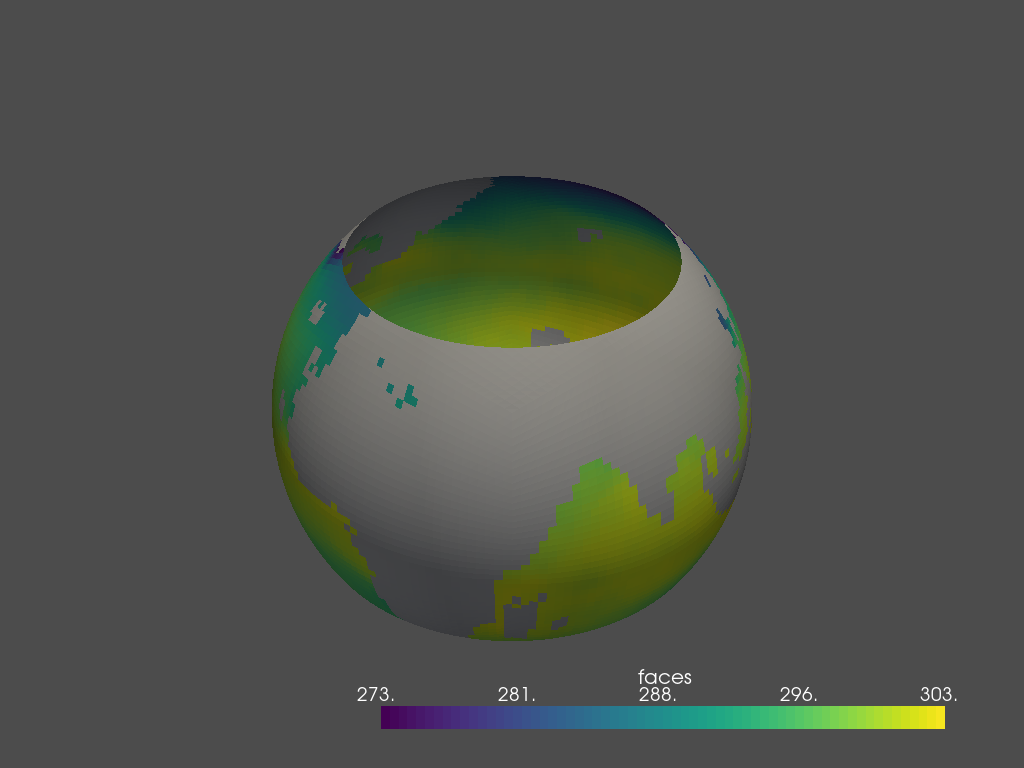

In [3]:
# Extract the region between latitude=(-30, 30)
min_lat = -np.sin(np.deg2rad(30))
max_lat = np.sin(np.deg2rad(30))

mesh_between_30s_30n = mesh.clip('z', invert=False, value=min_lat).clip('z', invert=True, value=max_lat)

mesh_between_30s_30n.plot()

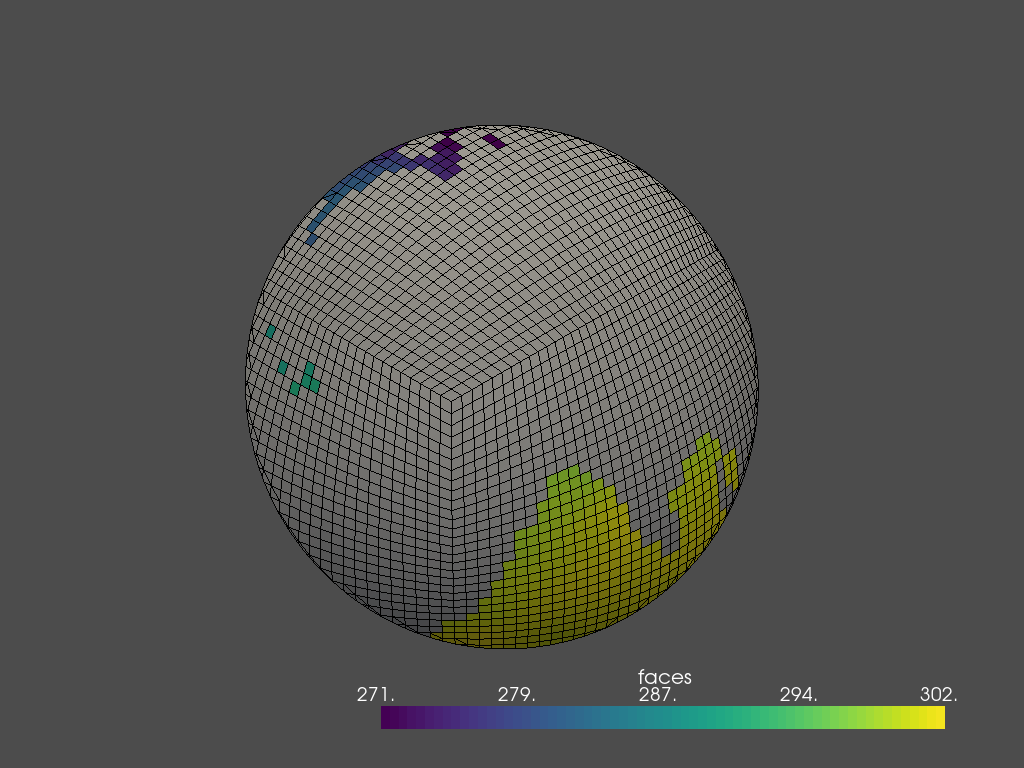

In [4]:
# Clip along a different normal.
mesh_cap = mesh.clip([0.5, 0.9, 0.8], invert=False, value=0.7)
mesh_cap.plot(show_edges=True)

### Clipping with a surface

In [5]:
surface = pv.Plane(center=(0, 0, 0.5), direction=(0, 0, 1), i_size=2, j_size=2)

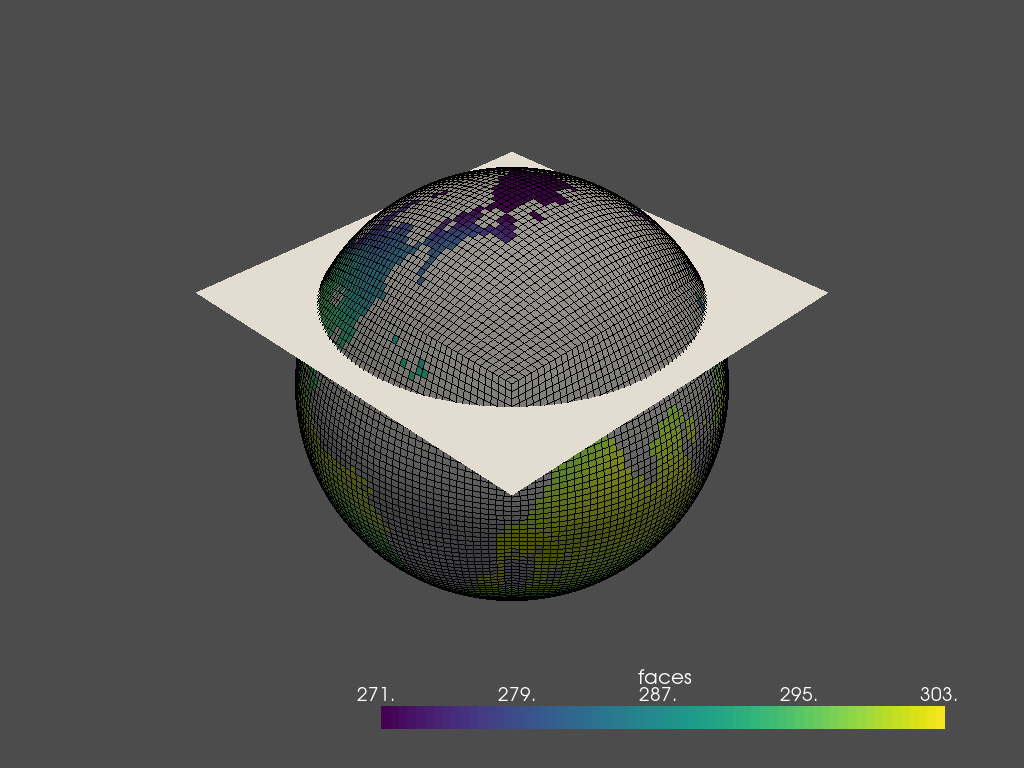

In [6]:
p = pv.Plotter()
p.add_mesh(surface, color='w')
p.add_mesh(mesh, show_edges=True)
p.show()

### Comparing "Trimmed" vs "Enclosed" Extractions

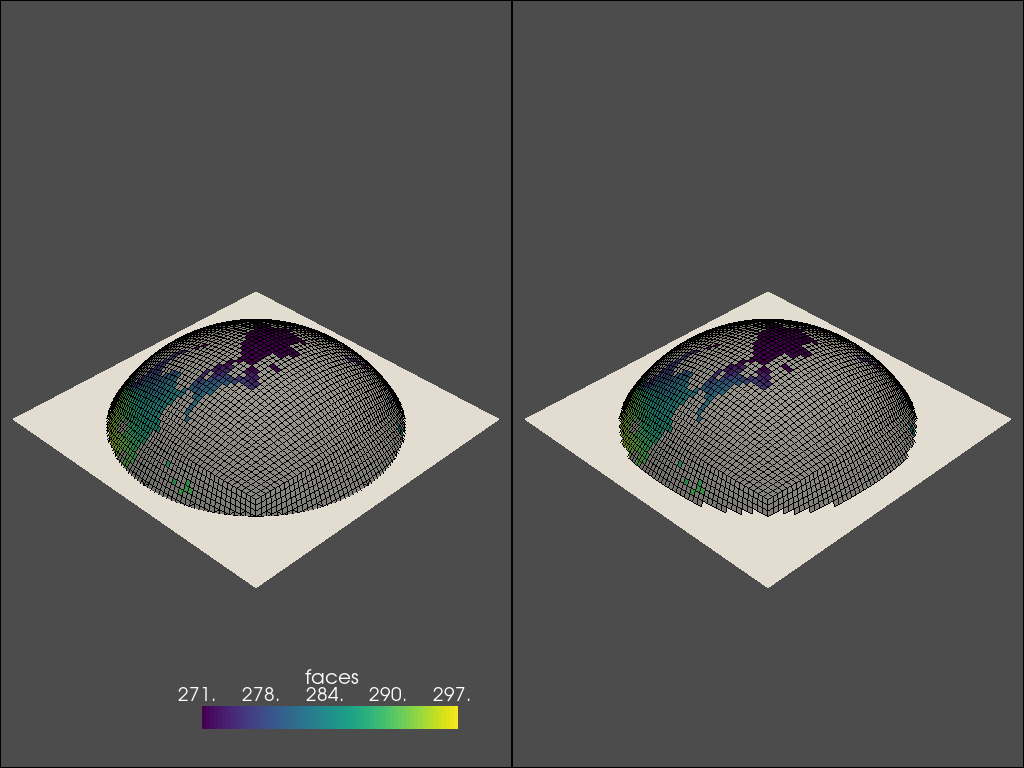

In [12]:
# Clip the mesh with the surface. We also "compute_distance" which will create a
# "implicit_distance" we can threshold to create the enclosed extraction.
mesh_above_60_trimmed = mesh.clip_surface(surface, compute_distance=True)
mesh_above_60_enclosed = mesh.threshold(0, scalars="implicit_distance", invert=True)

p = pv.Plotter(shape=(1,2))
p.add_mesh(mesh_above_60_trimmed, show_edges=True)
p.add_mesh(surface, color='w')
p.subplot(0,1)
p.add_mesh(mesh_above_60_enclosed, show_edges=True)
p.add_mesh(surface, color='w')
#p.link_views()
p.show()

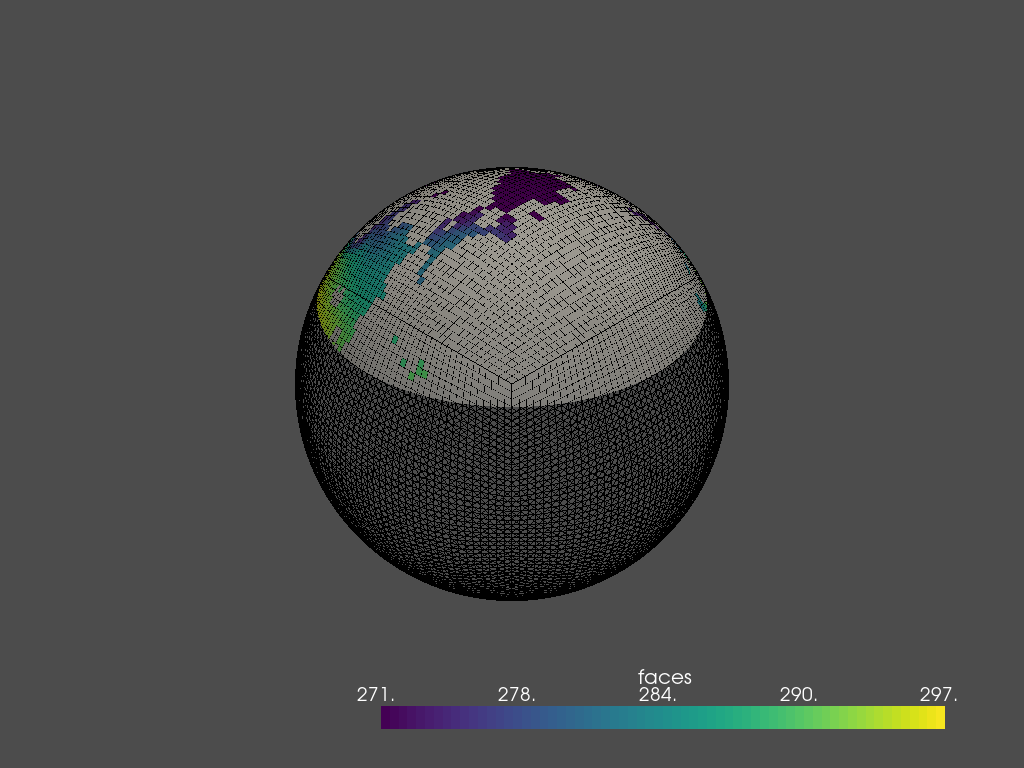

In [45]:
p = pv.Plotter()
p.add_mesh(mesh_above_60_trimmed)
p.add_mesh(mesh, style='wireframe', color='black')
p.show()

In [5]:
import os
os.path.basename('data/mesh_c42_.nc').split('_')[1][1:]

'42'